In [ ]:
import re
import os
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/11th_hour_political_tweets.csv')
df.head()
df.shape

<ipython-input-3-687b33cdacb9>:1: DtypeWarning: Columns (73,74,75,76,77,78,79,81) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/11th_hour_political_tweets.csv')


(46043, 97)

In [ ]:
df_names = df.columns.tolist()
df_names.remove('tweet_id')
df_names.remove('last_updated')
df_names.remove('created_at')
df_names.remove('user_location')
df_names.remove('full_text')

df_names

df.drop(columns= df_names, axis = 1, inplace= True)

In [ ]:
df.head()

,last_updated,tweet_id,created_at,user_location,full_text
0,2019-03-06T17:30:21.000+05:30,1.100000e+18,2019-03-06T03:33:25.000+05:30,Guwahati,Guwahati has gained a lot of prominence in rec...
1,2019-03-17T18:11:58.000+05:30,1.110000e+18,2019-03-17T17:27:57.000+05:30,NaN,RSS in school days itself? Indoctrinated since...
2,2019-03-23T18:07:38.000+05:30,1.110000e+18,2019-03-23T11:28:31.000+05:30,New Delhi,Words don't exist in Vaccum!\nModi's post Pulw...
3,2019-03-11T17:47:32.000+05:30,1.100000e+18,2019-02-26T07:40:28.000+05:30,NaN,India's #Icecream Industry stands at 15
4,2019-02-27T18:18:42.000+05:30,1.100000e+18,2019-02-27T12:21:18.000+05:30,"Delhi , Odisha",*40 CRPF Jawans killed in Pulwama Attack\n*IAF...


In [ ]:
df['user_location'] = df['user_location'].fillna('other')
df.head()

,last_updated,tweet_id,created_at,user_location,full_text
0,2019-03-06T17:30:21.000+05:30,1.100000e+18,2019-03-06T03:33:25.000+05:30,Guwahati,Guwahati has gained a lot of prominence in rec...
1,2019-03-17T18:11:58.000+05:30,1.110000e+18,2019-03-17T17:27:57.000+05:30,other,RSS in school days itself? Indoctrinated since...
2,2019-03-23T18:07:38.000+05:30,1.110000e+18,2019-03-23T11:28:31.000+05:30,New Delhi,Words don't exist in Vaccum!\nModi's post Pulw...
3,2019-03-11T17:47:32.000+05:30,1.100000e+18,2019-02-26T07:40:28.000+05:30,other,India's #Icecream Industry stands at 15
4,2019-02-27T18:18:42.000+05:30,1.100000e+18,2019-02-27T12:21:18.000+05:30,"Delhi , Odisha",*40 CRPF Jawans killed in Pulwama Attack\n*IAF...


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

last_updated     0
tweet_id         0
created_at       0
user_location    0
full_text        0
dtype: int64

In [ ]:
!pip install better-profanity
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 1.6 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from better_profanity import profanity
df.shape

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(46040, 5)

In [ ]:
stop_words = stopwords.words('english')

def clean_tweet(tweet):
    # convert to lower case
    tweet = tweet.lower()
    # censor profanity
    profanity.load_censor_words()
    tweet = profanity.censor(tweet)
    # remove twitter handlers
    tweet = re.sub('@[^\s]+', '', tweet)
    # remove hashtags
    tweet = re.sub(r'\B#\S+', '', tweet)
    # remove urls
    tweet = re.sub(r"http\S+", "", tweet)
    # remove special characters and punctuations
    tweet = re.sub(r'\W', ' ', tweet)
    # remove single characters except for 'a' and 'i'
    tweet = re.sub(r'\s+[a-hj-z]\s+', ' ', tweet)
    tweet = re.sub(r'\s+i\s+', ' I ', tweet)
    tweet = re.sub(r'\s+a\s+', ' a ', tweet)
    # substitute multiple spaces with single space
    tweet = re.sub(r'\s+', ' ', tweet, flags=re.I)

    # remove stop words
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])

    return tweet

In [ ]:
df['cleaned_tweets'] = df['full_text'].apply(clean_tweet)

In [ ]:
df.shape

(46040, 6)

In [ ]:
df.head()

,last_updated,tweet_id,created_at,user_location,full_text,cleaned_tweets
0,2019-03-06T17:30:21.000+05:30,1.100000e+18,2019-03-06T03:33:25.000+05:30,Guwahati,Guwahati has gained a lot of prominence in rec...,guwahati gained lot prominence recent years du...
1,2019-03-17T18:11:58.000+05:30,1.110000e+18,2019-03-17T17:27:57.000+05:30,other,RSS in school days itself? Indoctrinated since...,rss school days indoctrinated since childhood ...
2,2019-03-23T18:07:38.000+05:30,1.110000e+18,2019-03-23T11:28:31.000+05:30,New Delhi,Words don't exist in Vaccum!\nModi's post Pulw...,words exist vaccum modi post pulwama words gha...
3,2019-03-11T17:47:32.000+05:30,1.100000e+18,2019-02-26T07:40:28.000+05:30,other,India's #Icecream Industry stands at 15,india industry stands 15
4,2019-02-27T18:18:42.000+05:30,1.100000e+18,2019-02-27T12:21:18.000+05:30,"Delhi , Odisha",*40 CRPF Jawans killed in Pulwama Attack\n*IAF...,40 crpf jawans killed pulwama attack iaf strik...


In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['cleaned_tweets']]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['cleaned_tweets']]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['cleaned_tweets']]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['cleaned_tweets']]
df['comp_score']={}
df['comp_score'] = df['compound'].apply(lambda c: 0 if c ==0 else ((1 if c >0 else -1)))
df

<ipython-input-16-f66aa36a4d38>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['comp_score']={}


,last_updated,tweet_id,created_at,user_location,full_text,cleaned_tweets,compound,neg,neu,pos,comp_score
0,2019-03-06T17:30:21.000+05:30,1.100000e+18,2019-03-06T03:33:25.000+05:30,Guwahati,Guwahati has gained a lot of prominence in rec...,guwahati gained lot prominence recent years du...,0.6486,0.000,0.819,0.181,1
1,2019-03-17T18:11:58.000+05:30,1.110000e+18,2019-03-17T17:27:57.000+05:30,other,RSS in school days itself? Indoctrinated since...,rss school days indoctrinated since childhood ...,-0.7906,0.458,0.420,0.122,-1
2,2019-03-23T18:07:38.000+05:30,1.110000e+18,2019-03-23T11:28:31.000+05:30,New Delhi,Words don't exist in Vaccum!\nModi's post Pulw...,words exist vaccum modi post pulwama words gha...,-0.6597,0.190,0.810,0.000,-1
3,2019-03-11T17:47:32.000+05:30,1.100000e+18,2019-02-26T07:40:28.000+05:30,other,India's #Icecream Industry stands at 15,india industry stands 15,0.0000,0.000,1.000,0.000,0
4,2019-02-27T18:18:42.000+05:30,1.100000e+18,2019-02-27T12:21:18.000+05:30,"Delhi , Odisha",*40 CRPF Jawans killed in Pulwama Attack\n*IAF...,40 crpf jawans killed pulwama attack iaf strik...,-0.9638,0.500,0.500,0.000,-1
...,...,...,...,...,...,...,...,...,...,...,...
46038,2019-04-07T17:41:43.000+05:30,1.110000e+18,2019-04-07T15:21:43.000+05:30,New Delhi,My article for https://t.co/b8FIn1GYyz today -...,article today,0.0000,0.000,1.000,0.000,0
46039,2019-04-09T18:10:03.000+05:30,1.120000e+18,2019-04-09T12:19:44.000+05:30,Delhi,Not only in #Noida #homebuyers like #AntrikshS...,like roofs heads despite 8 yrs disillusioned,0.6002,0.000,0.505,0.495,1
46040,2019-03-06T18:09:39.000+05:30,1.100000e+18,2019-03-06T14:55:22.000+05:30,ಹಾಸನ Banglore Karnataka,Modi did nothing in last 5 yrs other than the ...,modi nothing last 5 yrs speaches filled lies p...,0.2100,0.095,0.747,0.157,1
46041,2019-02-08T18:25:06.000+05:30,1.090000e+18,2019-02-08T18:23:22.000+05:30,Others,Congress turns up heat on White House for answ...,congress turns heat white house answers journa...,-0.6597,0.206,0.794,0.000,-1


from matplotlib import pyplot as plt
df['tweet_id'].plot(kind='hist', bins=20, title='tweet_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['compound'].plot(kind='hist', bins=20, title='compound')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['neg'].plot(kind='hist', bins=20, title='neg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['neu'].plot(kind='hist', bins=20, title='neu')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='tweet_id', y='compound', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='compound', y='neg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='neg', y='neu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='neu', y='pos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['tweet_id'].plot(kind='line', figsize=(8, 4), title='tweet_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['compound'].plot(kind='line', figsize=(8, 4), title='compound')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['neg'].plot(kind='line', figsize=(8, 4), title='neg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['neu'].plot(kind='line', figsize=(8, 4), title='neu')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
excel_file_path = 'data.xlsx'
df.to_excel(excel_file_path, index=False)

In [ ]:
search_query=['bjp','pm','modi','narendramodi','barathiya janatha party']
BJP_Tweets=df[df['cleaned_tweets'].str.contains('|'.join(search_query))]

In [ ]:
BJP_Tweets
excel_file_path = 'BJPdata.xlsx'
BJP_Tweets.to_excel(excel_file_path, index=False)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
def get_cloud(data):
# this function creates word cloud
    comment_words = ''
    for val in BJP_Tweets['cleaned_tweets']:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        tok=[]
        for i in tokens:
            if i not in STOPWORDS:
                tok.append(i)

        comment_words += " ".join(tok)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(comment_words)
    plot_cloud(wordcloud,"cloud")
    return wordcloud
def plot_cloud(x,t):
# this function plots given word cloud
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(x)
    plt.title('X')
    plt.axis("off")
    plt.title(t)
    plt.show()

####Negitive cloud for BJP

<ipython-input-21-e1611248c62d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_2=data_2.append(val, ignore_index=True)


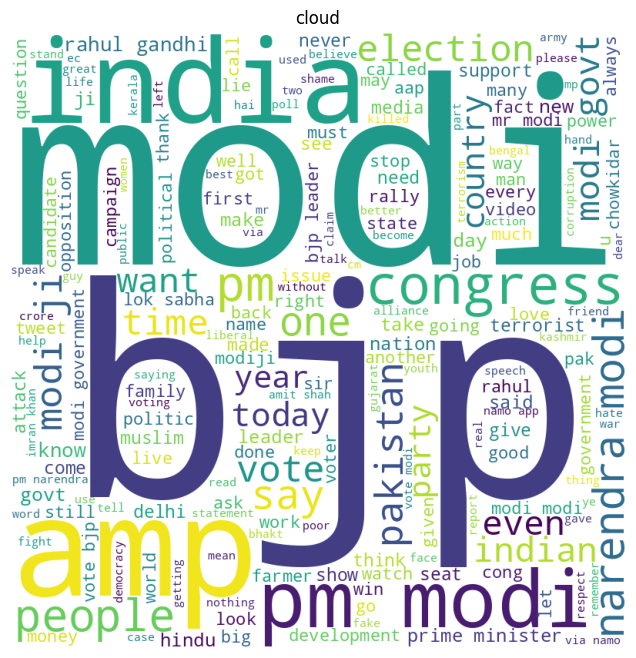

In [ ]:
data_2=pd.DataFrame()
no_of_BJP_neg=0
for index,val in BJP_Tweets.iterrows():
  if val['comp_score']==-1:
    no_of_BJP_neg=no_of_BJP_neg+1
    data_2=data_2.append(val, ignore_index=True)
get_cloud(data_2)

####Positive cloud for BJP

<ipython-input-22-a213f14ec4ef>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_2=data_2.append(val, ignore_index=True)


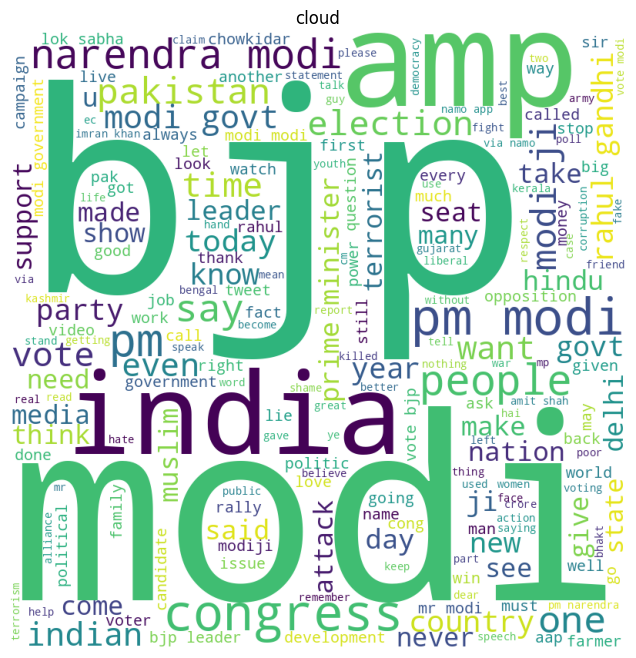

In [ ]:
data_2=pd.DataFrame()
no_of_BJP_pos=0
for index,val in BJP_Tweets.iterrows():
  if val['comp_score']==1:
    no_of_BJP_pos=no_of_BJP_pos+1
    data_2=data_2.append(val, ignore_index=True)
get_cloud(data_2)

#####Neutral cloud for bjp

<ipython-input-23-84a50acf8ea8>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_2=data_2.append(val, ignore_index=True)


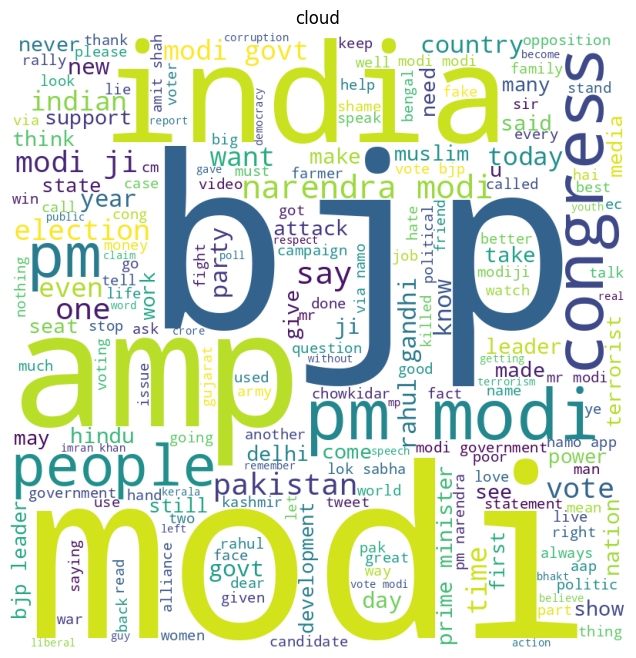

In [ ]:
data_2=pd.DataFrame()
no_of_BJP_neu=0
for index,val in BJP_Tweets.iterrows():
  if val['comp_score']==0:
    no_of_BJP_neu=no_of_BJP_neu+1
    data_2=data_2.append(val, ignore_index=True)
get_cloud(data_2)

 1    8316
-1    7518
 0    3674
Name: comp_score, dtype: int64


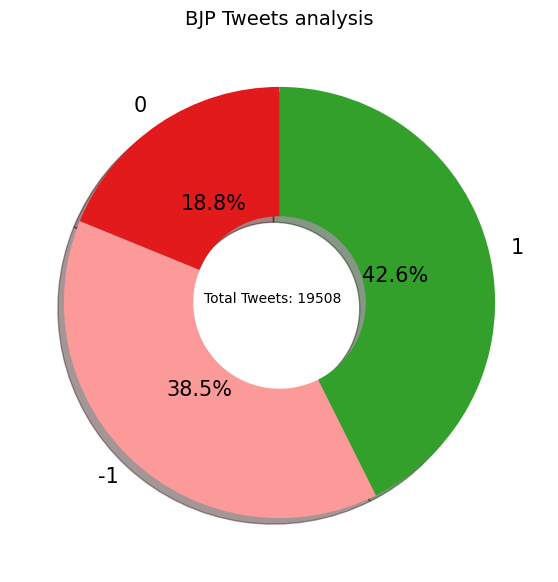

In [ ]:
import seaborn as sns
plt.figure(figsize = (7,7))
counts =BJP_Tweets['comp_score'].value_counts()
print(counts)
plt.pie(counts, labels = counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},autopct='%1.1f%%', pctdistance = 0.55, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,colors = sns.color_palette("Paired")[3:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(BJP_Tweets.shape[0]))
plt.title('BJP Tweets analysis', fontsize = 14)
plt.show()

# Congress

In [ ]:
search_query=['congress','rahul','rahul gandhi','soniagandhi','incindia','priyankagandhi']
Congress_tweets=df[df['cleaned_tweets'].str.contains('|'.join(search_query))]

In [ ]:
Congress_tweets
excel_file_path = 'congressdata.xlsx'
Congress_tweets.to_excel(excel_file_path, index=False)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
def get_cloud(data):
# this function creates word cloud
    comment_words = ''
    for val in Congress_tweets['cleaned_tweets']:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        tok=[]
        for i in tokens:
            if i not in STOPWORDS:
                tok.append(i)

        comment_words += " ".join(tok)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(comment_words)
    plot_cloud(wordcloud,"congress cloud")
    return wordcloud
def plot_cloud(x,t):
# this function plots given word cloud
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(x)
    plt.title('X')
    plt.axis("off")
    plt.title(t)
    plt.show()

# Negitive Congress tweets cloud

<ipython-input-28-9d435faad0fe>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_2=data_2.append(val, ignore_index=True)


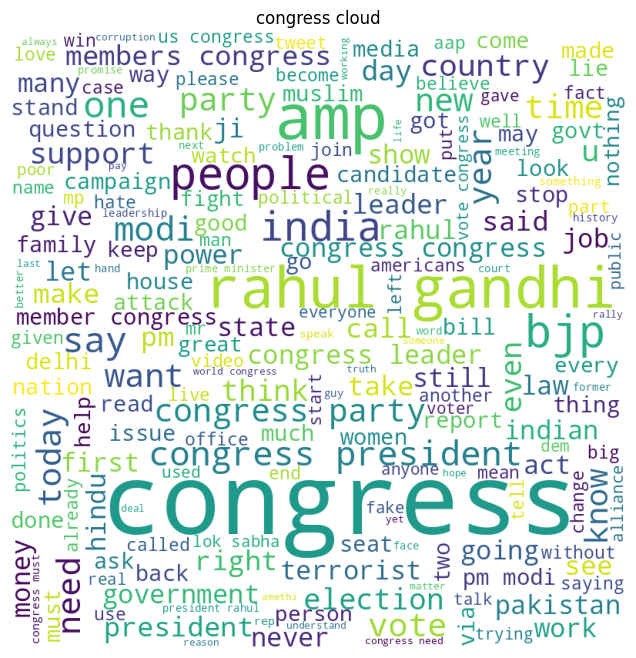

In [ ]:
data_2=pd.DataFrame()
for index,val in Congress_tweets.iterrows():
  if val['comp_score']==-1:
    data_2=data_2.append(val, ignore_index=True)
get_cloud(data_2)

# Congress Positive Tweets Cloud

<ipython-input-29-a6f88c86b30e>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_2=data_2.append(val, ignore_index=True)


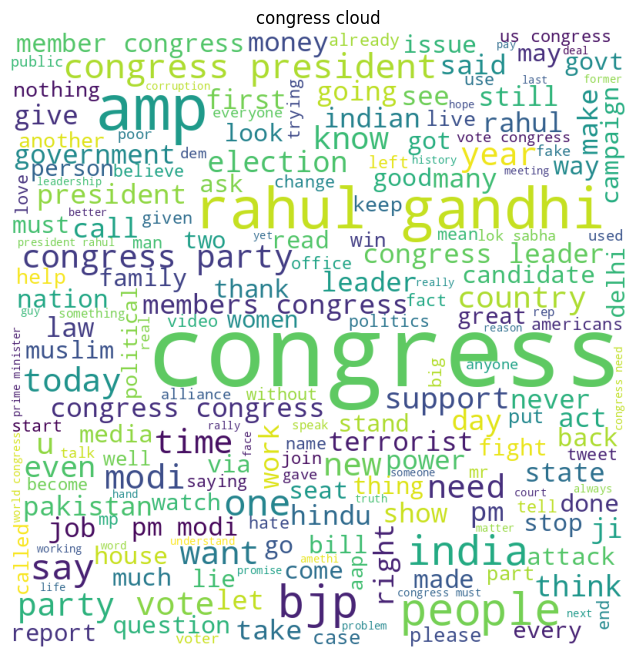

In [ ]:
data_2=pd.DataFrame()
for index,val in Congress_tweets.iterrows():
  if val['comp_score']==1:
    data_2=data_2.append(val, ignore_index=True)
get_cloud(data_2)

# Congress Neutral Tweets cloud

<ipython-input-30-14cb658a3da2>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_2=data_2.append(val, ignore_index=True)


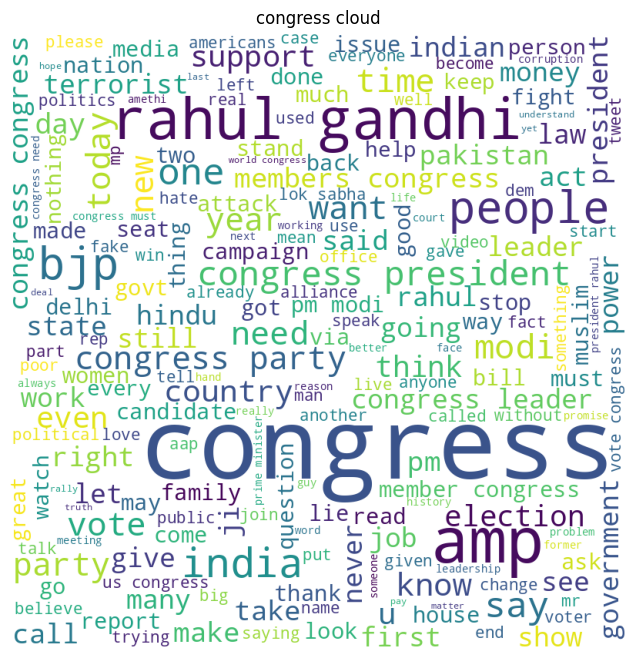

In [ ]:
data_2=pd.DataFrame()
for index,val in Congress_tweets.iterrows():
  if val['comp_score']==0:
    data_2=data_2.append(val, ignore_index=True)
get_cloud(data_2)

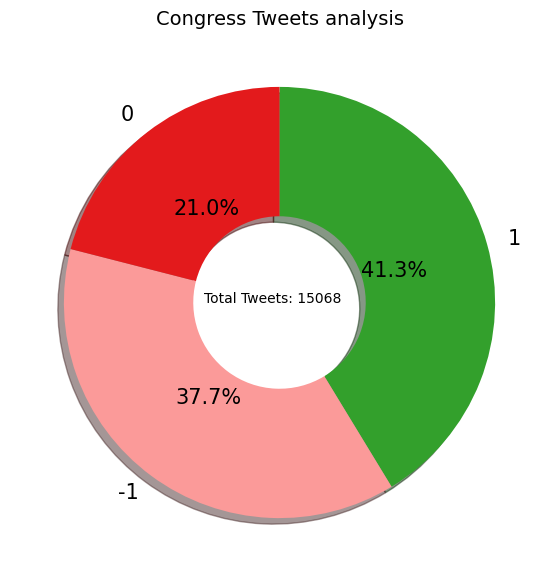

In [ ]:
import seaborn as sns
plt.figure(figsize = (7,7))
counts =Congress_tweets['comp_score'].value_counts()
plt.pie(counts, labels = counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},autopct='%1.1f%%', pctdistance = 0.55, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,colors = sns.color_palette("Paired")[3:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(Congress_tweets.shape[0]))
plt.title('Congress Tweets analysis', fontsize = 14)
plt.show()

# checking the data loss

In [ ]:
union_data=pd.concat([Congress_tweets,BJP_Tweets],ignore_index=True)
union_data.shape

(34576, 11)